In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [2]:
if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')

In [3]:
caminho = r'C:\Users\ryan-rosa\Desktop\Ryan\Python\ProjetoEstagio\Banco_De_Dados_Slide3'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'20220218.csv'

In [4]:
#dados = pd.read_csv(f'{caminho}/{ultimo_arquivo}',sep=";")
dados = pd.read_csv(r'C:\Users\ryan-rosa\Desktop\Ryan\Python\ProjetoEstagio\Banco_De_Dados_Slide3/20220217.csv',sep=';')

In [5]:
filtrado = dados[['DATA_SINTOMAS','COD_IBGE']]
filtrado['DATA_SINTOMAS'] = pd.to_datetime(filtrado['DATA_SINTOMAS'],infer_datetime_format=True,format='%d/%m/%Y')
filtrado = filtrado.groupby('DATA_SINTOMAS').count()
filtrado = filtrado.sort_values(by=['DATA_SINTOMAS'])
filtrado = filtrado.reset_index()
filtrado.tail()

C:\Users\RYAN-R~1\AppData\Local\Temp/ipykernel_10896/2413552184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrado['DATA_SINTOMAS'] = pd.to_datetime(filtrado['DATA_SINTOMAS'],infer_datetime_format=True,format='%d/%m/%Y')


,DATA_SINTOMAS,COD_IBGE
716,2022-02-11,4595
717,2022-02-12,3304
718,2022-02-13,1816
719,2022-02-14,1160
720,2022-02-15,264


In [6]:
media_movel = filtrado.set_index('DATA_SINTOMAS')
media_movel = media_movel.rolling(7).mean()
media_movel = media_movel.reset_index()
media_movel.tail(20)

,DATA_SINTOMAS,COD_IBGE
701,2022-01-27,15567.285714
702,2022-01-28,15067.285714
703,2022-01-29,14529.142857
704,2022-01-30,13971.428571
705,2022-01-31,13268.714286
706,2022-02-01,12819.285714
707,2022-02-02,12308.857143
708,2022-02-03,11780.857143
709,2022-02-04,11193.571429
710,2022-02-05,10752.571429


In [7]:
semana = filtrado.iloc[6:]
semana = semana['DATA_SINTOMAS']
semana = semana.map(lambda x: str(x)[2:10])
semana

6      20-03-03
7      20-03-04
8      20-03-05
9      20-03-06
10     20-03-07
         ...   
716    22-02-11
717    22-02-12
718    22-02-13
719    22-02-14
720    22-02-15
Name: DATA_SINTOMAS, Length: 715, dtype: object

In [8]:
casos_sintomas = media_movel.iloc[6:]
casos_sintomas = casos_sintomas['COD_IBGE']
casos_sintomas

6        10.714286
7        12.000000
8        14.285714
9        15.428571
10       16.142857
          ...     
716    7117.142857
717    6315.571429
718    5402.714286
719    4199.428571
720    3158.714286
Name: COD_IBGE, Length: 715, dtype: float64

In [9]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 18_2_2022'

In [10]:
np.size(semana)

715

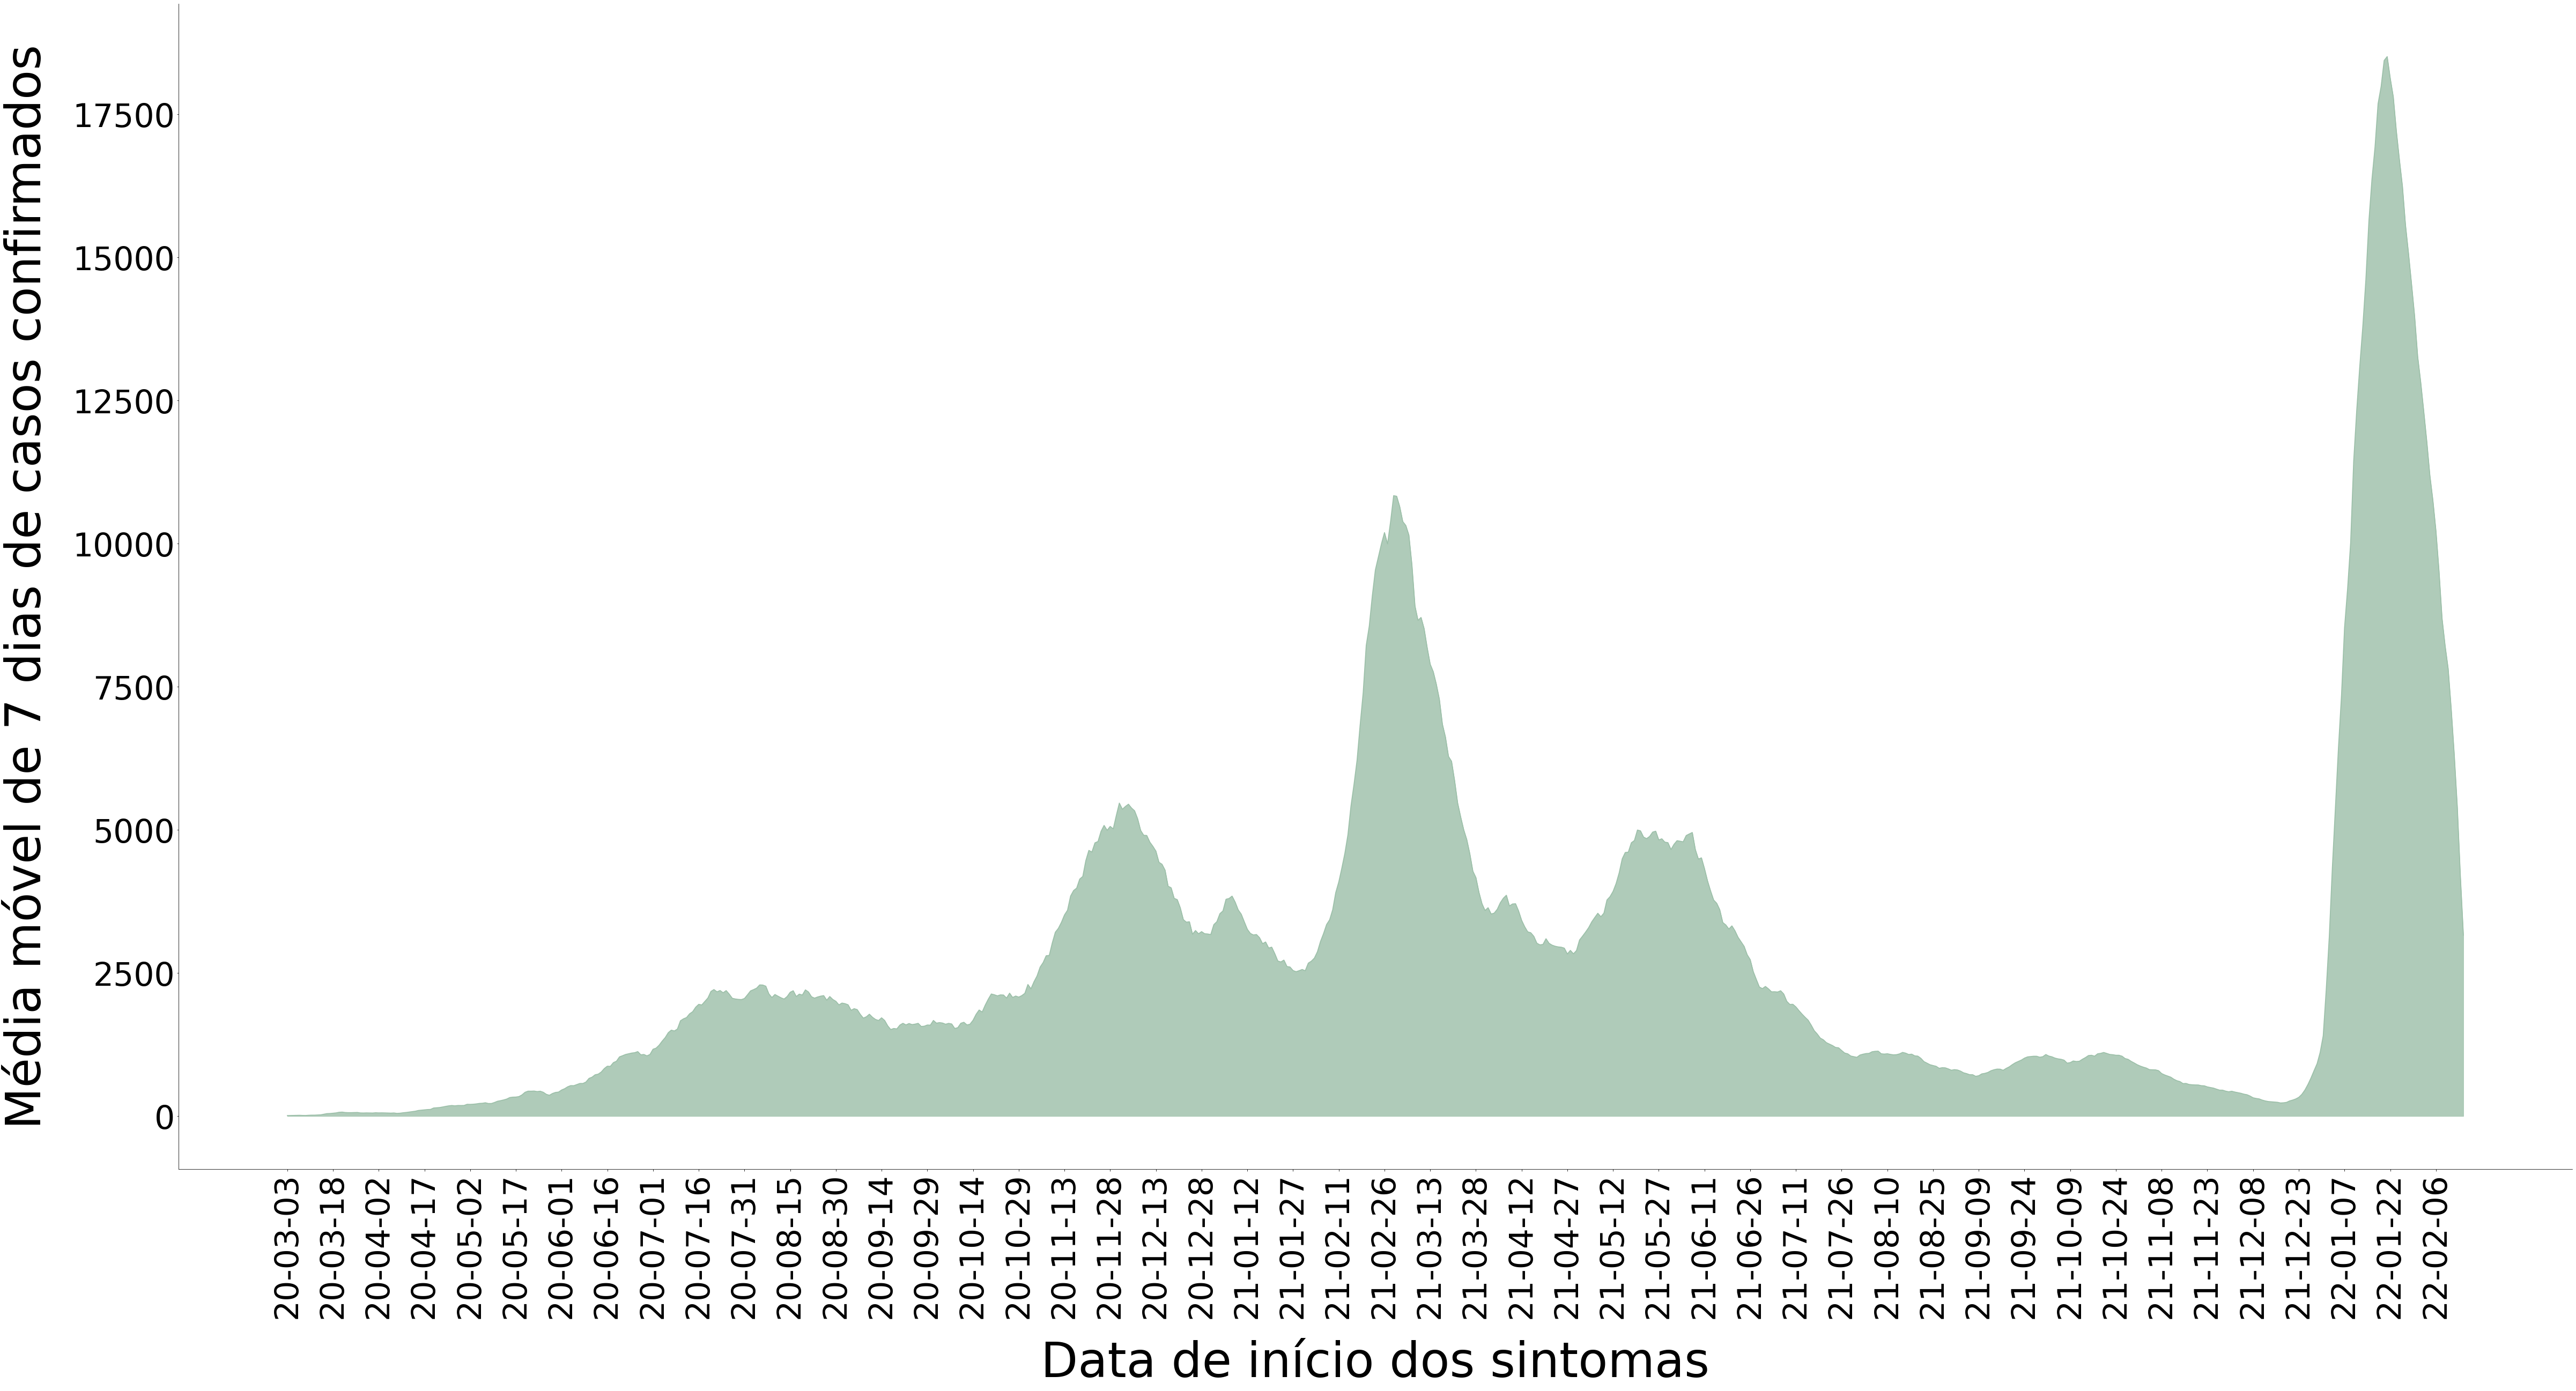

In [19]:
plt.figure(figsize=(80,40))
plt.plot(semana,casos_sintomas,color='#9bbfa8')
plt.fill_between(semana,casos_sintomas,alpha=0.8,where=(casos_sintomas>=0),color='#9bbfa8')
sns.despine()
plt.xlabel("Data de início dos sintomas",labelpad=40,fontsize=90)
plt.ylabel('Média móvel de 7 dias de casos confirmados',labelpad=40,fontsize=90)
plt.xticks(np.arange(0,np.size(semana),15),fontsize=60,rotation=90)
plt.yticks(fontsize=60)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Slide3.png',dpi=300,bbox_inches='tight')

# CRIANCAS GRAFICO

In [ ]:
'''filtrado = dados[['FAIXAETARIA','DATA_SINTOMAS','COD_IBGE']]
filtrado['FAIXAETARIA'] = filtrado['FAIXAETARIA'].map({'<1':'Até 9 anos','01 a 04':'Até 9 anos','05 a 09':'Até 9 anos','10 a 14':'10 a 14','15 a 19':'15 a 19',
'20 a 29':'20 a 29','30 a 39':'30 a 39','40 a 49':'40 a 49','50 a 59':'50 a 59','60 a 69':'60 a 69','70 a 79':'70 a 79','80 e mais':'80 e mais'})
filtrado['DATA_SINTOMAS'] = pd.to_datetime(filtrado['DATA_SINTOMAS'],infer_datetime_format=True,format='%d/%m/%Y')
filtrado['DATA_SINTOMAS'] = filtrado['DATA_SINTOMAS'].map(lambda x: str(x)[0:7])
filtrado'''

In [ ]:
'''todasIdades = filtrado.groupby('DATA_SINTOMAS').count()
todasIdades = todasIdades.sort_values(by=['DATA_SINTOMAS'])
todasIdades'''

In [ ]:
'''ate9 = filtrado.loc[filtrado['FAIXAETARIA']=='Até 9 anos']
ate9 = ate9.groupby('DATA_SINTOMAS').count()
ate9 = ate9.sort_values(by=['DATA_SINTOMAS'])
ate9'''

In [ ]:
'''calculo = ate9['FAIXAETARIA']/todasIdades['FAIXAETARIA']*100
calculo = calculo.to_frame()
calculo = calculo.drop('2020-02')
calculo = calculo.reset_index()
calculo'''

In [ ]:
'''mes = calculo['DATA_SINTOMAS']
mes'''

In [17]:
'''calculo = calculo['FAIXAETARIA']'''

In [ ]:
'''plt.figure(figsize=(30,10))
plt.plot(mes,calculo,linewidth=3)
sns.despine()
plt.xticks(rotation=90,fontsize=20)
plt.yticks(np.arange(0,10,2),fontsize=20)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()])
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Slide3_Ate9anos.png',dpi=300,bbox_inches='tight')'''